# Clustering Songs by Mood

Music is a medium that conveys emotion or a mood. People usually listen to songs that align with the mood that they are feeling. In this first part of my project, I'll create playlists from my personal spotify songs which I obtained through the Spotify API. You can see the code for this in notebook 2. Spotify API Data Gathering. 

Let's import our personal data obtained from the Spotify API. 

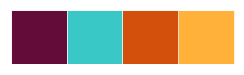

In [142]:
import pandas as pd
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('darkgrid')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [143]:
# import the csv we obtained from notebook 2
songs_df = pd.read_csv('mysongsdf.csv')
songs_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Autumn Leaves - Deluxe Edition,0.89200,0.555,0.257,0.1240,-12.637,0.0299,89.013,0.431
1,I'm Not The Only One,0.56200,0.515,0.494,0.0771,-5.780,0.0416,81.329,0.474
2,If I Ever Feel Better,0.04920,0.755,0.553,0.0646,-9.449,0.1070,119.700,0.836
3,Electric Love,0.00448,0.621,0.853,0.2360,-6.537,0.0615,120.017,0.650
4,lovers’ carvings,0.68000,0.558,0.470,0.5320,-5.500,0.0316,118.060,0.427


In [144]:
# see basic stats
songs_df.describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.278151,0.591813,0.598676,0.175615,-7.500083,0.068941,118.518030,0.472354
std,0.289125,0.149985,0.204575,0.142033,3.098334,0.073549,28.205634,0.230039
min,0.000139,0.192000,0.076800,0.024800,-20.284000,0.024600,60.042000,0.054400
25%,0.037150,0.503250,0.460500,0.096675,-9.142500,0.033700,97.070250,0.289500
50%,0.161000,0.596500,0.627000,0.118000,-7.035500,0.043300,118.150500,0.433000
75%,0.453000,0.696250,0.757250,0.201250,-5.280000,0.066125,137.887250,0.650000
max,0.977000,0.946000,0.966000,0.912000,-1.542000,0.681000,217.978000,0.974000


We'll drop energy, valence, and tempo because they are very highly correlated with mood and will cause overfitting.

In [145]:
songs_df2 = songs_df.drop(['energy','valence','tempo'],axis=1)
songs_df2.head()

,track,acousticness,danceability,liveness,loudness,speechiness
0,Autumn Leaves - Deluxe Edition,0.89200,0.555,0.1240,-12.637,0.0299
1,I'm Not The Only One,0.56200,0.515,0.0771,-5.780,0.0416
2,If I Ever Feel Better,0.04920,0.755,0.0646,-9.449,0.1070
3,Electric Love,0.00448,0.621,0.2360,-6.537,0.0615
4,lovers’ carvings,0.68000,0.558,0.5320,-5.500,0.0316


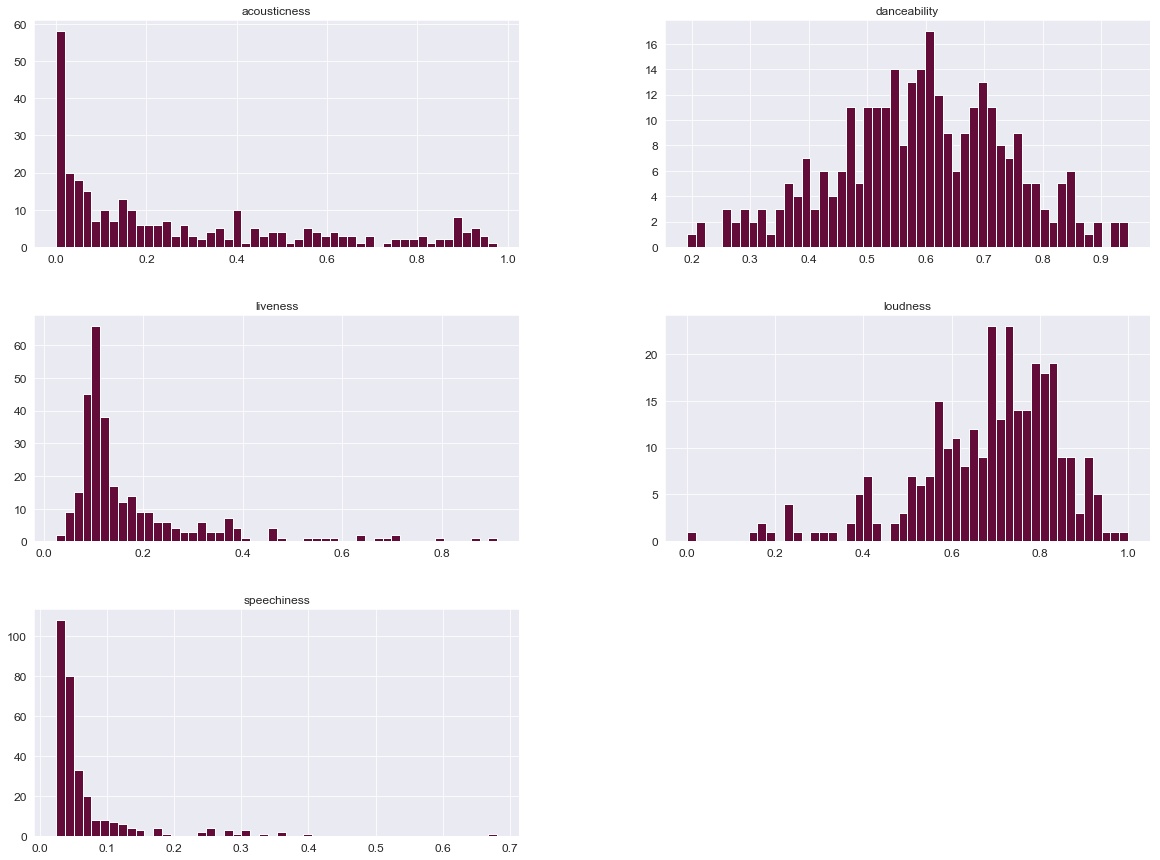

In [146]:
# scale loudness to be between 0 and 1
loudness = songs_df2[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs_df2['loudness'] = pd.DataFrame(loudness_scaled)

songs_df2.hist(bins=50,figsize=(20,15));

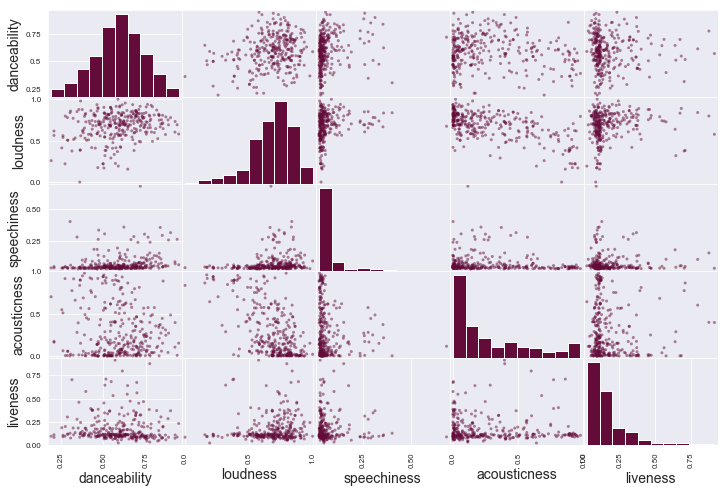

In [147]:
# attributes should contain the features we want to compare
attributes = ['danceability','loudness','speechiness','acousticness','liveness']

scatter_matrix(songs_df2[attributes],figsize=(12,8));

In [148]:
# remove song names before clustering
features = songs_df2.copy()
features = songs_df2.drop(['track'],axis=1)

In [149]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

In [150]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4533518018571971)
For n_clusters = 3, silhouette score is 0.31288992765812973)
For n_clusters = 4, silhouette score is 0.29065088107128845)
For n_clusters = 5, silhouette score is 0.24772159432340782)
For n_clusters = 6, silhouette score is 0.21888957295938738)
For n_clusters = 7, silhouette score is 0.23329565164699329)
For n_clusters = 8, silhouette score is 0.23347949367350262)
For n_clusters = 9, silhouette score is 0.22550552858478715)
For n_clusters = 10, silhouette score is 0.22339896957597744)
For n_clusters = 11, silhouette score is 0.2275489753129877)
For n_clusters = 12, silhouette score is 0.22493334137586937)
For n_clusters = 13, silhouette score is 0.21249564216313438)
For n_clusters = 14, silhouette score is 0.21101645591366294)


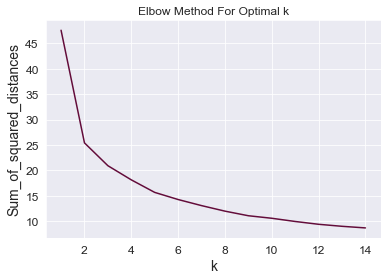

In [151]:
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [152]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
y_kmeans = kmeans.predict(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

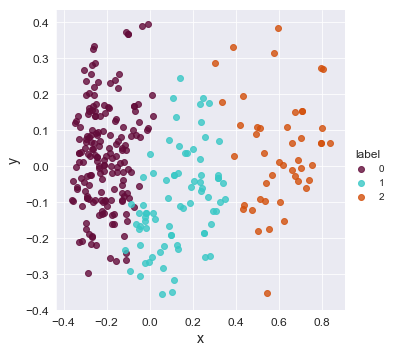

In [154]:
# create dataframe with our pca components
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. This is why we will also use t-SNE. 
<br/><br/>

T-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function.

In [155]:
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(features)

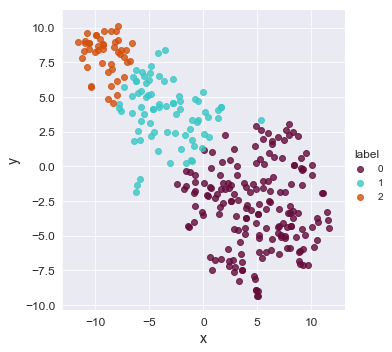

In [156]:
# create dataframe with our t-sne components
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [157]:
pca.explained_variance_ratio_

array([0.60863616, 0.14625768])

In [158]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.913447     -0.098975 -0.041715 -0.390824    -0.036539
PC-2     -0.212619     -0.920626  0.148701 -0.269134    -0.112679


In [159]:
songs_df['label'] = y_kmeans

# shuffle dataset

songs_df = songs_df.sample(frac=1)
songs_df['label'].value_counts()

0    177
1     77
2     46
Name: label, dtype: int64

In [160]:
songs_df[songs_df['label'] == 0] # cheerful playlist

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
177,Sweater Weather,0.049500,0.612,0.807,0.1010,-2.810,0.0336,124.053,0.398,0
286,You Only Live Once,0.023800,0.630,0.908,0.1160,-2.420,0.0326,120.522,0.968,0
216,Supercut - El-P Remix,0.043000,0.785,0.478,0.1200,-8.974,0.0422,120.978,0.205,0
282,Go Bang,0.071400,0.598,0.893,0.1460,-3.072,0.0319,120.972,0.485,0
201,Kick On,0.009890,0.322,0.769,0.1850,-5.858,0.0371,144.480,0.508,0
126,Viva La Vida,0.094100,0.485,0.619,0.1090,-7.115,0.0289,138.017,0.416,0
140,Walk The Wire,0.001160,0.534,0.894,0.0981,-5.015,0.0418,139.480,0.713,0
134,Renegades,0.014400,0.526,0.862,0.2290,-6.003,0.0905,90.052,0.528,0
281,Late Night,0.038400,0.622,0.650,0.2090,-6.407,0.0636,125.157,0.385,0
276,Confidence,0.063700,0.590,0.562,0.1050,-9.607,0.0505,140.835,0.561,0


In [161]:
songs_df[songs_df['label'] == 1] # energetic playlist

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
237,It's Strange (feat. K.Flay),0.371,0.837,0.492,0.1020,-7.792,0.3540,85.951,0.4170,1
180,The Trouble with Us,0.338,0.828,0.744,0.1580,-4.932,0.0646,121.090,0.8310,1
226,Instant Crush,0.332,0.852,0.362,0.1960,-6.888,0.0425,99.995,0.4280,1
210,Better Not (feat. Wafia),0.278,0.783,0.537,0.2290,-2.921,0.0749,113.977,0.3920,1
270,Let It All Out,0.395,0.570,0.604,0.9120,-9.480,0.0306,106.975,0.5310,1
225,Playinwitme (feat. Kehlani),0.302,0.687,0.587,0.2780,-5.772,0.1240,156.575,0.6760,1
236,Way to be Loved,0.605,0.583,0.515,0.0931,-9.283,0.0571,115.732,0.6030,1
49,You & Me,0.436,0.652,0.627,0.0674,-7.313,0.0894,137.867,0.3150,1
234,Go Fuck Yourself,0.571,0.765,0.327,0.0787,-8.029,0.2770,74.931,0.2920,1
89,Say You'll Be There,0.626,0.635,0.467,0.1180,-7.047,0.0297,99.978,0.4050,1


In [162]:
songs_df[songs_df['label'] == 2] # chill playlist

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
162,Paint,0.896,0.364,0.3080,0.1230,-13.052,0.0402,73.331,0.3890,2
68,Guiding Light (featuring Ed Sheeran),0.700,0.453,0.2080,0.1010,-12.607,0.0290,133.101,0.2710,2
24,First Day Of My Life,0.915,0.468,0.2010,0.0952,-17.024,0.0388,94.422,0.3830,2
56,Hunger Of The Pine,0.785,0.600,0.4130,0.1090,-9.572,0.0258,93.618,0.0741,2
179,"Take Me Home, Country Roads - Rerecorded",0.546,0.255,0.4300,0.1880,-12.564,0.0322,164.267,0.5460,2
27,Beautiful Girl,0.861,0.645,0.1700,0.1130,-17.377,0.0408,110.573,0.3290,2
36,Big Black Car,0.897,0.572,0.1830,0.1030,-16.069,0.0323,110.029,0.4040,2
62,All of Me,0.922,0.422,0.2640,0.1320,-7.064,0.0322,119.930,0.3310,2
86,When I Was Your Man,0.932,0.612,0.2800,0.0880,-8.648,0.0434,72.795,0.3870,2
25,The Girl,0.936,0.499,0.1590,0.1180,-16.154,0.0337,77.691,0.3030,2


In [61]:
izzy2018_df = pd.read_csv('izzy2018_df.csv')
izzy2019_df = pd.read_csv('izzy2019_df.csv')
bestofdecade_df = pd.read_csv('bestofdecade_df.csv')

## My 2018 Moods

In [62]:
izzy2018_df.head()

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Let Me Down Easy,0.22000,0.672,0.899,0.142,-6.878,0.0323,139.010,0.927
1,Nice For What,0.09340,0.567,0.913,0.114,-6.471,0.0736,93.350,0.792
2,Paris in the Rain,0.77100,0.426,0.408,0.394,-9.419,0.0524,76.309,0.528
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.682,-3.627,0.0512,125.854,0.257
4,Kick On,0.00989,0.322,0.769,0.185,-5.858,0.0371,144.480,0.508


In [63]:
izzy2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
track           100 non-null object
acousticness    100 non-null float64
danceability    100 non-null float64
energy          100 non-null float64
liveness        100 non-null float64
loudness        100 non-null float64
speechiness     100 non-null float64
tempo           100 non-null float64
valence         100 non-null float64
dtypes: float64(8), object(1)
memory usage: 7.1+ KB


In [64]:
izzy2018_df.describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.236116,0.657530,0.621010,0.185413,-6.949190,0.106381,121.785240,0.506907
std,0.245601,0.151544,0.167355,0.147916,2.656847,0.113218,27.199954,0.214570
min,0.000047,0.240000,0.116000,0.046300,-18.564000,0.024600,76.309000,0.069000
25%,0.035075,0.557750,0.497750,0.099200,-8.486250,0.037625,100.643500,0.349250
50%,0.143500,0.675500,0.628500,0.114000,-6.765500,0.055900,120.006500,0.498500
75%,0.385750,0.775500,0.746250,0.221500,-5.095750,0.121750,139.919750,0.642500
max,0.952000,0.939000,0.942000,0.874000,-2.420000,0.681000,200.040000,0.968000


In [65]:
#izzy2018_df = izzy2018_df.drop(['energy','valence','tempo'],axis=1)
#izzy2018_df.head()

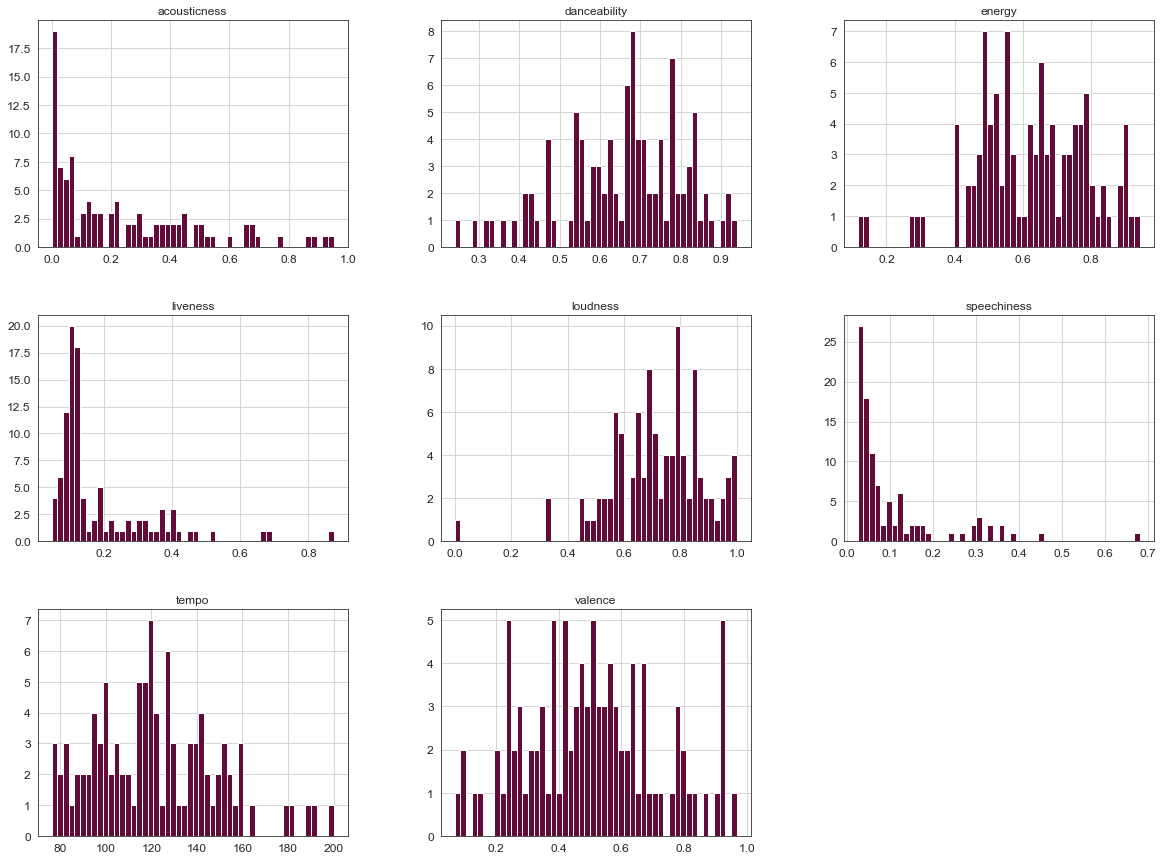

In [66]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too

loudness = izzy2018_df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
izzy2018_df['loudness'] = pd.DataFrame(loudness_scaled)

izzy2018_df.hist(bins=50,figsize=(20,15));

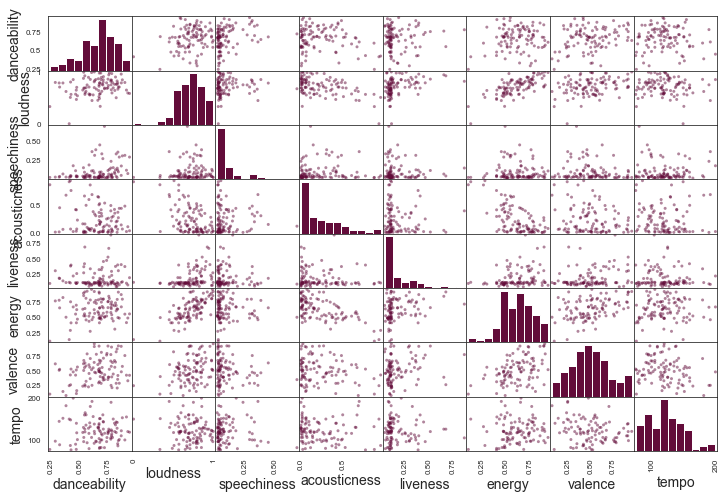

In [67]:
# attributes should contain the features we want to compare
attributes = ['danceability','loudness','speechiness','acousticness','liveness','energy','valence','tempo']

scatter_matrix(izzy2018_df[attributes],figsize=(12,8));

In [68]:
# remove song names before clustering
features = izzy2018_df.copy()
features = izzy2018_df.drop(['track'],axis=1)

In [69]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

In [70]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5648643049532183)
For n_clusters = 3, silhouette score is 0.5566670967753737)
For n_clusters = 4, silhouette score is 0.6065764993110844)
For n_clusters = 5, silhouette score is 0.5957784625370371)
For n_clusters = 6, silhouette score is 0.5837246207205465)
For n_clusters = 7, silhouette score is 0.586167124826762)
For n_clusters = 8, silhouette score is 0.5758271154172876)
For n_clusters = 9, silhouette score is 0.5691128313913072)
For n_clusters = 10, silhouette score is 0.5795058753148509)
For n_clusters = 11, silhouette score is 0.5816729017598569)
For n_clusters = 12, silhouette score is 0.5663898764667188)
For n_clusters = 13, silhouette score is 0.5597378601342691)
For n_clusters = 14, silhouette score is 0.5511751916337143)


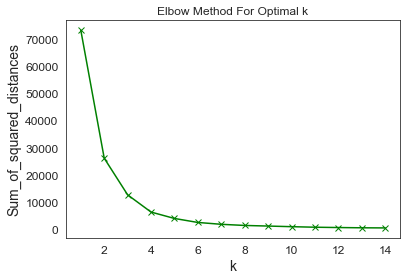

In [71]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
# PCA to reduce our data to 2 dimensions for visualisation

y_kmeans = kmeans.predict(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

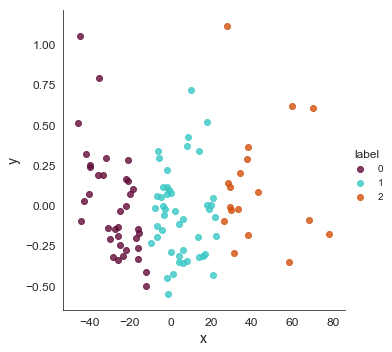

In [83]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [75]:
 #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(features)

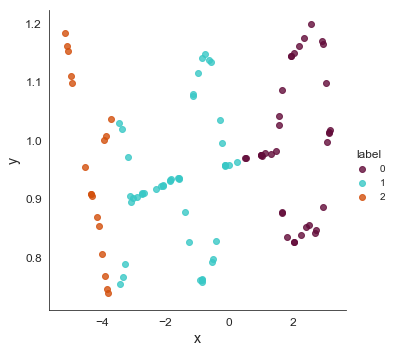

In [76]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [77]:
pca.explained_variance_ratio_

array([9.99707858e-01, 1.35733084e-04])

In [78]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability    energy  liveness  loudness  speechiness  \
PC-1     -0.000864     -0.000100  0.000521 -0.000272 -0.000468    -0.000103   
PC-2      0.657518     -0.163621 -0.448049 -0.153659 -0.395319     0.004238   

         tempo   valence  
PC-1  0.999998 -0.001614  
PC-2 -0.000088 -0.400305  


In [84]:
izzy2018_df['label'] = y_kmeans

# shuffle dataset

izzy2018_df = izzy2018_df.sample(frac=1)
izzy2018_df['label'].value_counts()

1    46
0    36
2    18
Name: label, dtype: int64

In [85]:
izzy2018_df[izzy2018_df['label'] == 0]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
25,Tell Me You Love Me,0.11700,0.762,0.797,0.2020,0.982037,0.1350,122.066,0.525,0
11,Better Not (feat. Wafia),0.27800,0.783,0.537,0.2290,0.968967,0.0749,113.977,0.392,0
48,Hell & Back,0.68500,0.382,0.498,0.1140,0.622522,0.0377,181.881,0.069,0
63,The Chain,0.01620,0.682,0.492,0.1070,0.335295,0.0569,151.016,0.398,0
82,Calypso,0.13800,0.866,0.859,0.4010,0.958684,0.0587,109.972,0.923,0
70,Snow,0.14000,0.741,0.578,0.1110,0.682916,0.0296,105.727,0.800,0
34,"The Deepest Sighs, the Frankest Shadows",0.05650,0.355,0.812,0.1410,0.786856,0.0767,151.818,0.139,0
7,Life Itself,0.01470,0.699,0.670,0.3560,0.764680,0.0347,111.988,0.556,0
3,Slow (feat. Noah Cyrus) - CID Remix,0.00381,0.547,0.901,0.6820,0.925235,0.0512,125.854,0.257,0
39,I Like It,0.09900,0.816,0.726,0.3720,0.902255,0.1290,136.048,0.650,0


In [86]:
izzy2018_df[izzy2018_df['label'] == 1]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
80,The Ringer,0.031100,0.939,0.551,0.1920,0.584613,0.2910,118.552,0.4200,1
36,Flow,0.158000,0.529,0.626,0.1140,0.650273,0.0490,117.985,0.2310,1
16,Back Down South,0.063400,0.476,0.619,0.2580,0.702614,0.0398,117.113,0.1540,1
77,Way to be Loved,0.605000,0.583,0.515,0.0931,0.574889,0.0571,115.732,0.6030,1
38,Lucky You (feat. Joyner Lucas),0.062700,0.876,0.786,0.1270,0.847374,0.3060,153.068,0.5750,1
83,Changing Of The Seasons,0.000047,0.535,0.881,0.1100,0.876177,0.1560,129.975,0.6210,1
14,Satisfied (feat. MAX),0.007590,0.750,0.651,0.5210,0.861558,0.1210,120.055,0.9280,1
10,Chateau,0.658000,0.661,0.585,0.1020,0.452738,0.0367,129.980,0.6060,1
37,Bootleg Rascal,0.508000,0.671,0.481,0.0835,0.523600,0.0486,136.045,0.4870,1
33,ATM,0.115000,0.719,0.497,0.0898,0.675359,0.6810,81.651,0.3450,1


In [87]:
izzy2018_df[izzy2018_df['label'] == 2]

,track,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
13,The Man,0.072700,0.606,0.942,0.0709,0.988974,0.1150,106.020,0.518,2
12,In My Feelings,0.058900,0.835,0.626,0.3960,0.788590,0.1250,91.030,0.350,2
58,Bulletproof,0.000441,0.674,0.882,0.0680,0.978258,0.0477,123.016,0.682,2
53,Good Nights (feat. Mascolo),0.443000,0.849,0.483,0.0786,0.709242,0.2910,101.015,0.282,2
5,Love Lies (with Normani),0.095600,0.708,0.648,0.1340,0.801412,0.0449,143.955,0.338,2
0,Let Me Down Easy,0.220000,0.672,0.899,0.1420,0.723860,0.0323,139.010,0.927,2
56,Stranger Things,0.443000,0.867,0.663,0.1170,0.788280,0.1780,121.978,0.481,2
75,KOD,0.210000,0.831,0.782,0.1130,0.761274,0.1500,141.869,0.199,2
21,Alone (Feat. Big Sean & Stefflon Don),0.016400,0.445,0.662,0.2190,0.852453,0.1810,200.040,0.479,2
23,Need You,0.262000,0.753,0.750,0.0928,0.737797,0.0345,117.995,0.388,2


## My 2019 Moods

## Throughout the decade

## All My Songs 

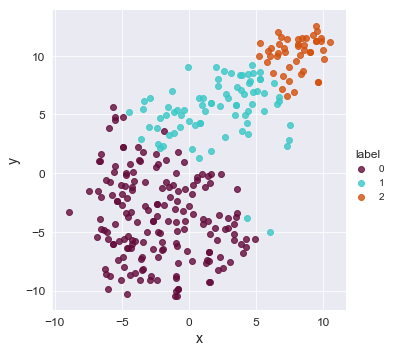

array([0.60863616, 0.14625768])

      acousticness  danceability  liveness  loudness  speechiness
PC-1      0.913447     -0.098975 -0.041715 -0.390824    -0.036539
PC-2     -0.212619     -0.920626  0.148701 -0.269134    -0.112679


0    175
1     79
2     46
Name: label, dtype: int64

,track,acousticness,danceability,liveness,loudness,speechiness,label
60,XO,0.171000,0.470,0.3130,0.605698,0.2600,0
102,Sober,0.097200,0.699,0.5620,0.736528,0.0304,0
206,Say My Name (feat. Zyra),0.004100,0.749,0.0748,0.689201,0.0479,0
199,Cough Syrup,0.034300,0.534,0.1150,0.692402,0.0417,0
154,Breezeblocks,0.096000,0.616,0.2050,0.692882,0.0344,0
216,Supercut - El-P Remix,0.043000,0.785,0.1200,0.603457,0.0422,0
38,I'd Rather Be with You,0.083300,0.601,0.1360,0.425942,0.0344,0
61,Falling,0.076000,0.741,0.0835,0.780920,0.0690,0
214,Sun Models (feat. Madelyn Grant),0.191000,0.683,0.0907,0.592786,0.0750,0
265,Live in the Moment,0.002000,0.546,0.1150,0.691869,0.0348,0


,track,acousticness,danceability,liveness,loudness,speechiness,label
153,Walking On A Dream,0.245,0.870,0.0588,0.786629,0.0459,1
175,Window to the Sky,0.289,0.718,0.0754,0.746292,0.0777,1
266,Hurt Somebody (With Julia Michaels),0.361,0.830,0.2490,0.807705,0.1180,1
89,Say You'll Be There,0.626,0.635,0.1180,0.706275,0.0297,1
246,The Law (feat. Mac Miller & Rapsody),0.249,0.744,0.0965,0.692936,0.3010,1
235,Coming Over - filous Remix,0.487,0.791,0.0996,0.491250,0.0459,1
53,Flaws,0.405,0.570,0.0723,0.709476,0.0356,1
273,My Life,0.227,0.744,0.1030,0.661295,0.0378,1
19,Every Other Freckle,0.614,0.543,0.1180,0.674848,0.0700,1
17,Stay With Me,0.559,0.416,0.1100,0.734607,0.0408,1


,track,acousticness,danceability,liveness,loudness,speechiness,label
97,Lullaby,0.699,0.192,0.0973,0.258777,0.0337,2
42,"Free Fallin' - Live at the Nokia Theatre, Los ...",0.771,0.315,0.7020,0.374667,0.0317,2
87,Make You Feel My Love,0.910,0.325,0.1130,0.514193,0.0311,2
33,Kiss Me,0.640,0.589,0.0248,0.192829,0.0498,2
96,To Be Alone - Live at the Pepper Canister Chur...,0.861,0.516,0.7090,0.381603,0.0448,2
27,Beautiful Girl,0.861,0.645,0.1130,0.155106,0.0408,2
257,Hell & Back,0.685,0.382,0.1140,0.628001,0.0377,2
110,Ho Hey,0.794,0.685,0.0915,0.598122,0.0304,2
68,Guiding Light (featuring Ed Sheeran),0.700,0.453,0.1010,0.409615,0.0290,2
101,Bloom - Bonus Track,0.882,0.592,0.1120,0.559705,0.0246,2


# What is my Spotify Mood

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neural_network import MLPClassifier

X = features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [198]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[18  2  0]
 [ 0 32  0]
 [ 2  0  6]]


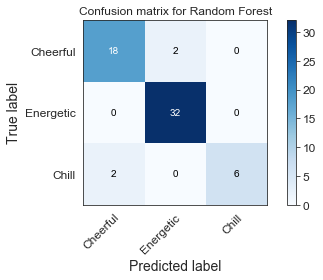

In [199]:
# Confusion matrix
definitions = ['Cheerful','Energetic','Chill']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [200]:
# View a list of the features and their importance scores
features = features.columns
list(zip(features, rfc.feature_importances_))

[('acousticness', 0.7191077199440501),
 ('danceability', 0.07437398933930137),
 ('liveness', 0.02614887774481801),
 ('loudness', 0.13549464027667),
 ('speechiness', 0.044874772695160624)]

In [201]:
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [202]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[18  2  0]
 [ 0 32  0]
 [ 2  0  6]]


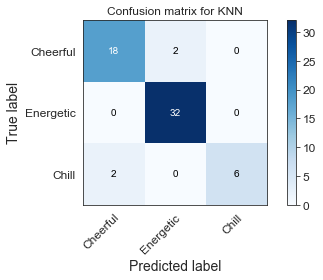

In [203]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [204]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[18  2  0]
 [ 0 32  0]
 [ 2  0  6]]


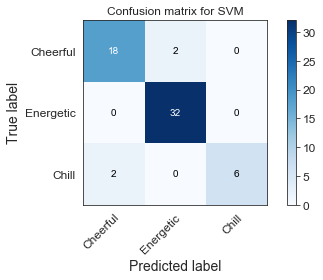

In [205]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

# Deep Learning

In [117]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

NameError: name 'MLPClassifier' is not defined

In [208]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[17  3  0]
 [ 0 32  0]
 [ 2  0  6]]


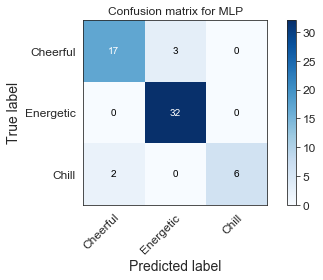

In [209]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [210]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

    Cheerful       0.89      0.85      0.87        20
   Energetic       0.91      1.00      0.96        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.92        60
   macro avg       0.94      0.87      0.89        60
weighted avg       0.92      0.92      0.91        60
MLP


In [211]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

    Cheerful       0.90      0.90      0.90        20
   Energetic       0.94      1.00      0.97        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.93        60
   macro avg       0.95      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60
SVM


In [212]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

    Cheerful       0.90      0.90      0.90        20
   Energetic       0.94      1.00      0.97        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.93        60
   macro avg       0.95      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60
KNN


In [213]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

    Cheerful       0.90      0.90      0.90        20
   Energetic       0.94      1.00      0.97        32
       Chill       1.00      0.75      0.86         8

    accuracy                           0.93        60
   macro avg       0.95      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60
forest
